In [56]:
%pip install langchain langchain-google-genai python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\deep\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


generator

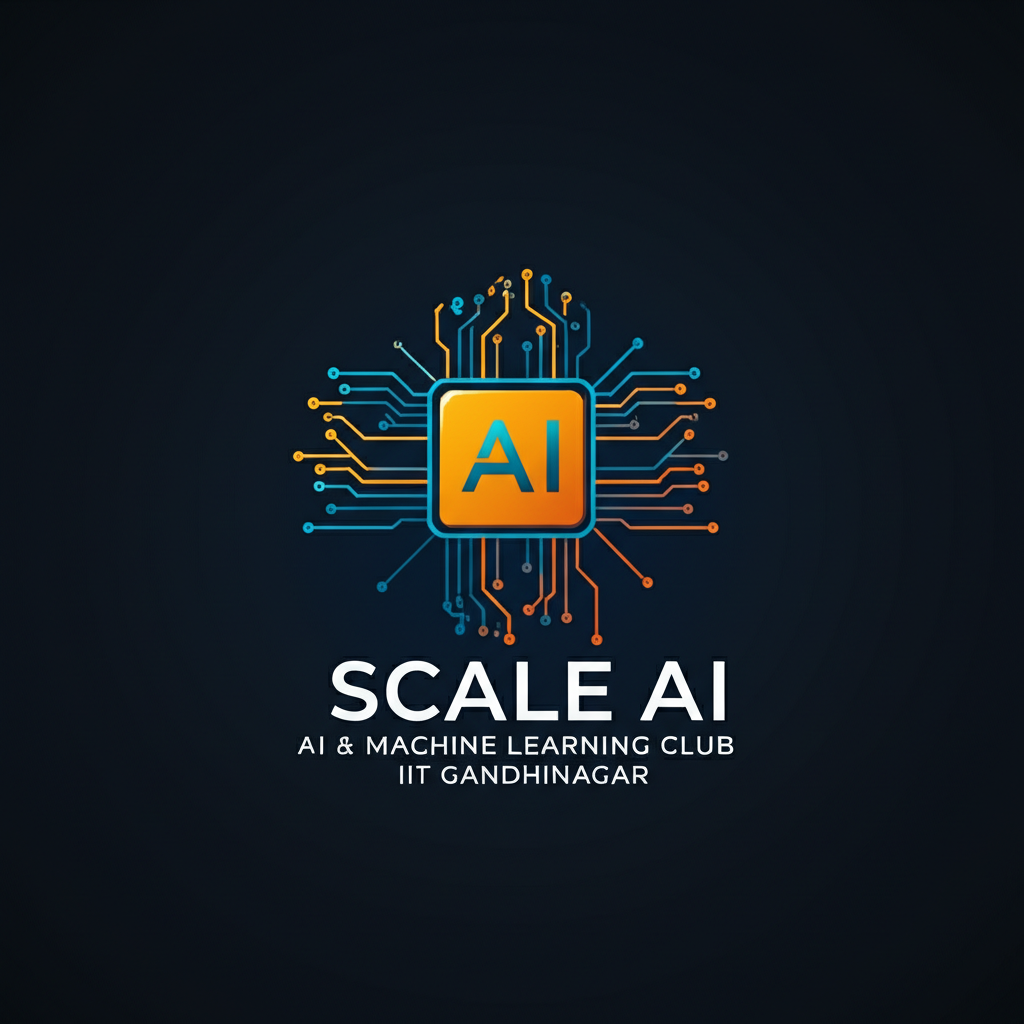

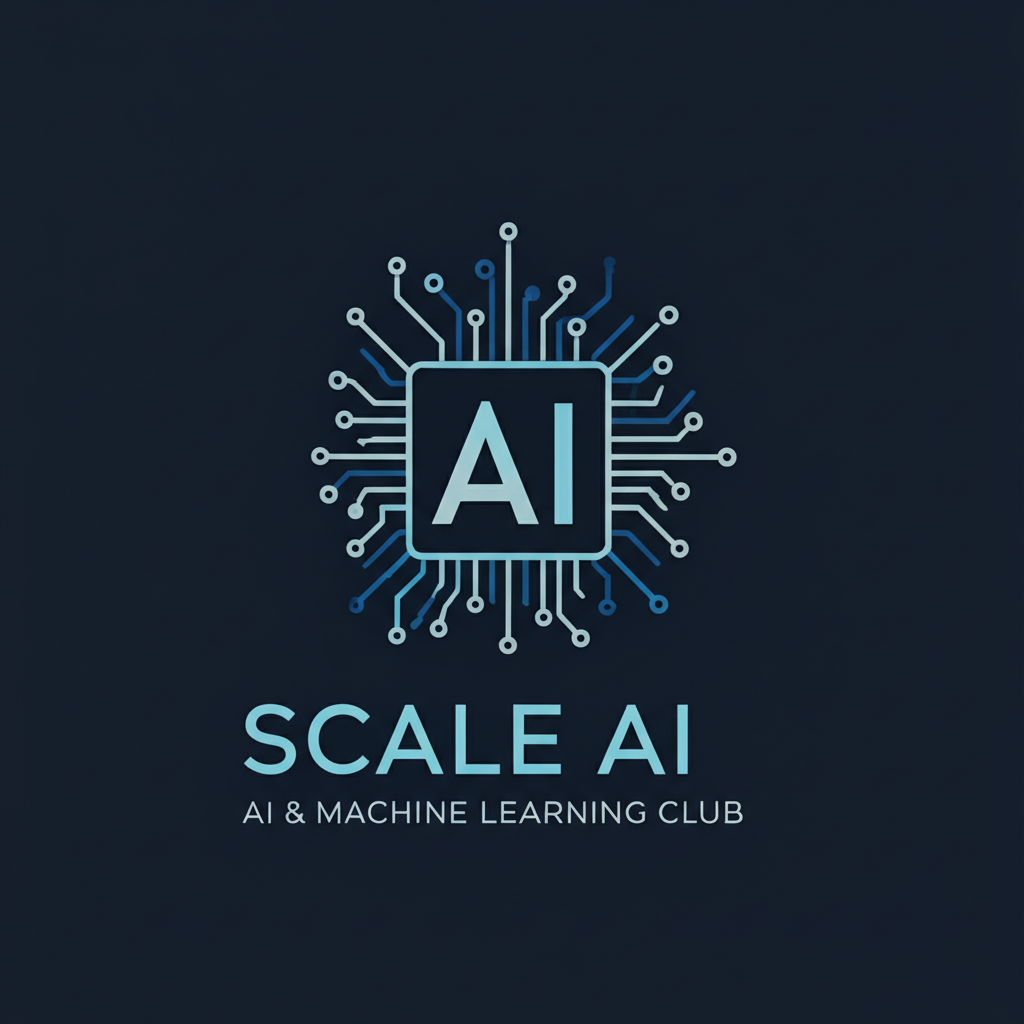

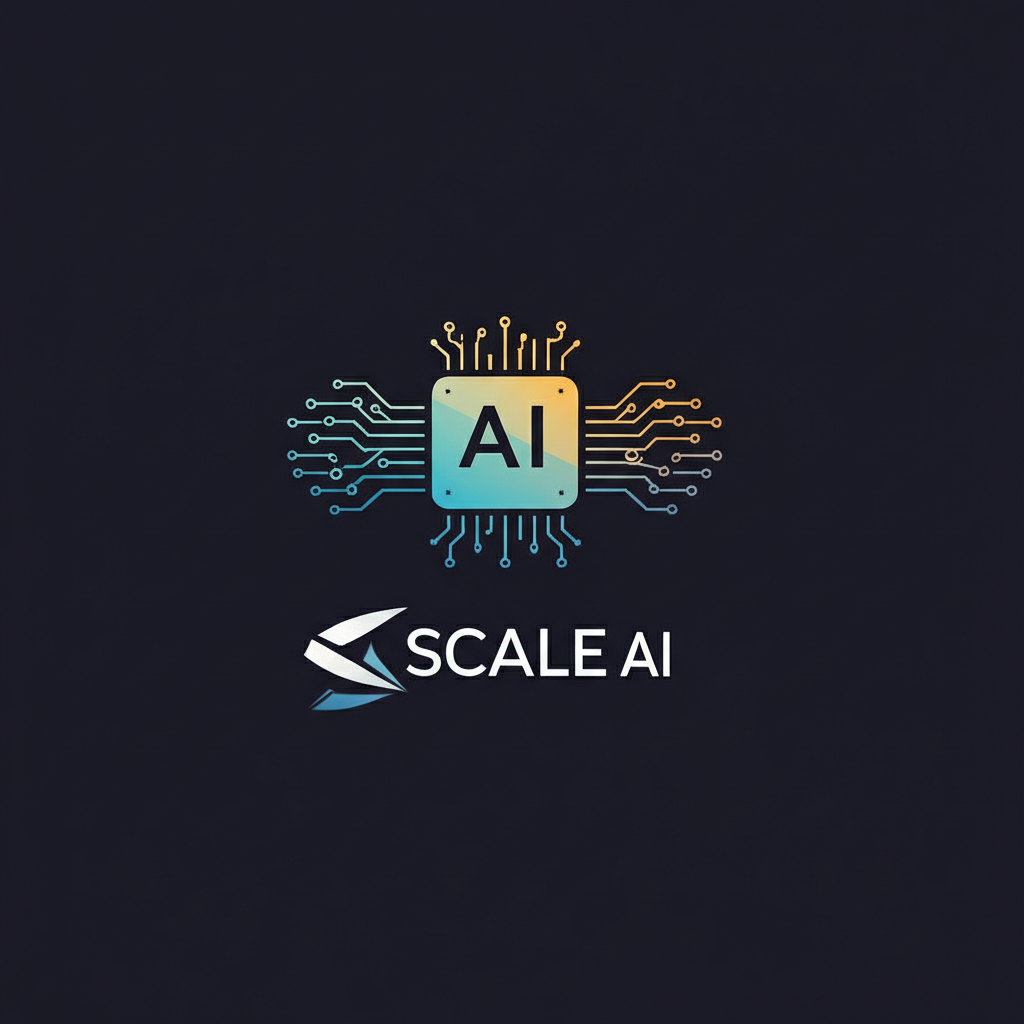

In [61]:
import base64
from IPython.display import Image, display
from langchain_core.messages import AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash-preview-image-generation")
user_input = input("Additional details or preferences for the logo design.")
message = {
    "role": "user",
    "content": f"Generate a professional logo for the SCALE AI & Machine Learning Club at IIT Gandhinagar.Do NOT include any text in the image. Focus on AI and machine learning themes.use {user_input} to design the logo as user want",
}


def _get_image_base64(response: AIMessage) -> None:
    image_block = next(
        block
        for block in response.content
        if isinstance(block, dict) and block.get("image_url")
    )
    return image_block["image_url"].get("url").split(",")[-1]

logo_candidates = []
num_logos = 3
for _ in range(num_logos):
    response = llm.invoke(
        [message],
        generation_config=dict(response_modalities=["TEXT", "IMAGE"])
    )
    image_base64 = _get_image_base64(response)
    logo_candidates.append(image_base64)
    display(Image(data=base64.b64decode(image_base64), width=300))


Judge

--- Starting Logo Review ---

Reviewing Logo 1...


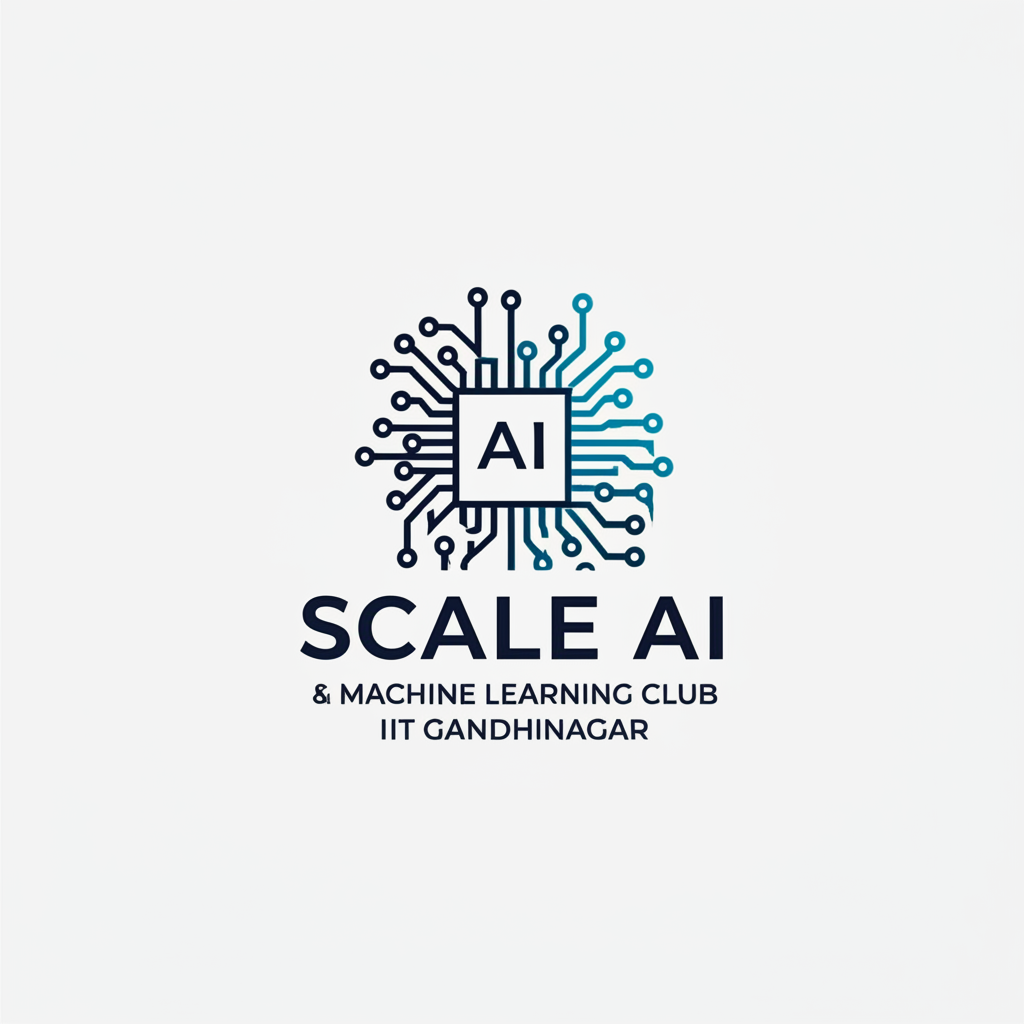

Review: The logo effectively uses the circuit board imagery to symbolize AI/ML.  The "AI" within the central square is clear and the color gradient adds a touch of modernity.  The design is vector-friendly and scales well. However, it lacks uniqueness; similar circuit board designs are common.  The connection to IIT Gandhinagar's academic identity is weak – there's nothing visually linking it to the university.  Monochrome readability is good.  It feels more like a generic tech company logo than a university club brand.

Rating: 6/10

Reviewing Logo 2...


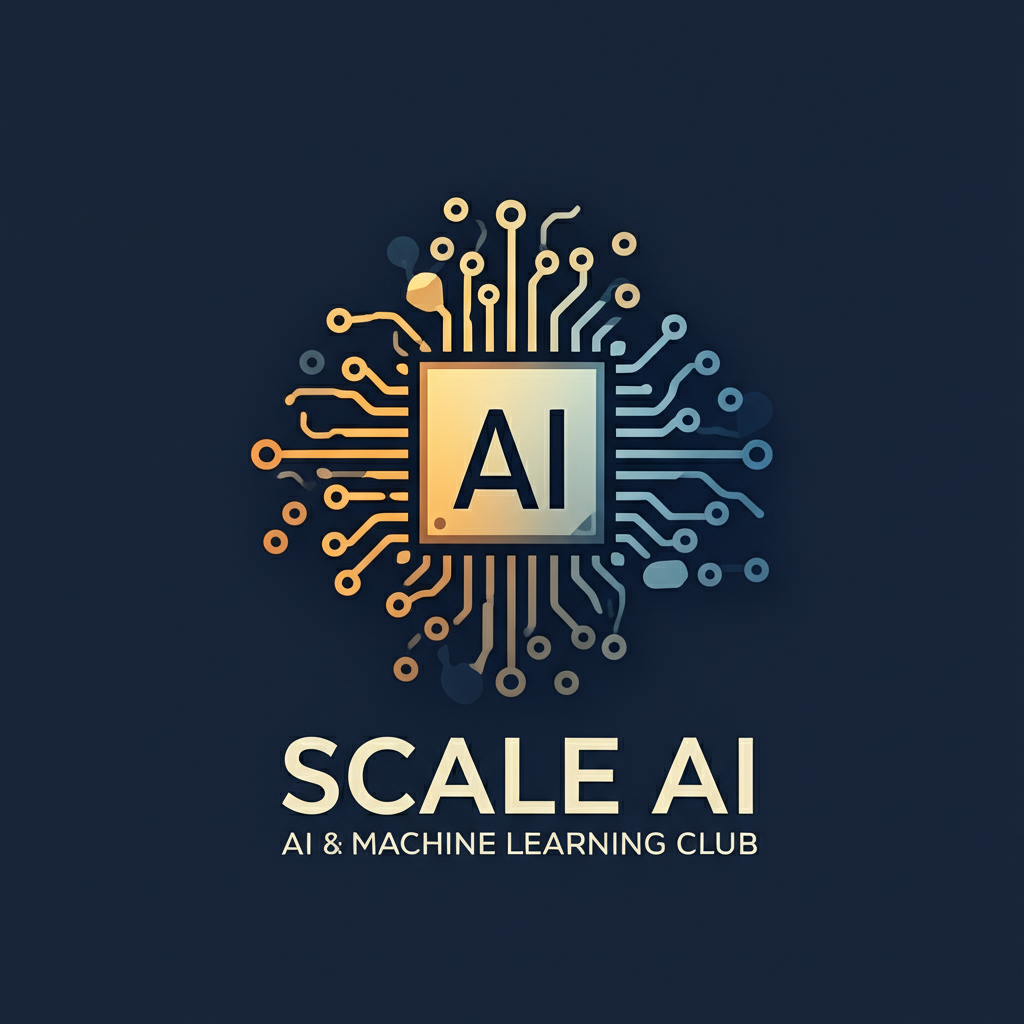

Review: The logo effectively combines AI/ML symbolism (circuit board) with a clean, professional aesthetic.  The color gradient adds visual interest. However, it lacks uniqueness; the circuit board motif is overused in tech logos.  The connection to IIT Gandhinagar's identity is absent.  While scalable and vector-friendly, the recognizability in monochrome is somewhat weak.  It feels more like a generic tech company logo than a university club brand.

Rating: 6/10

Reviewing Logo 3...


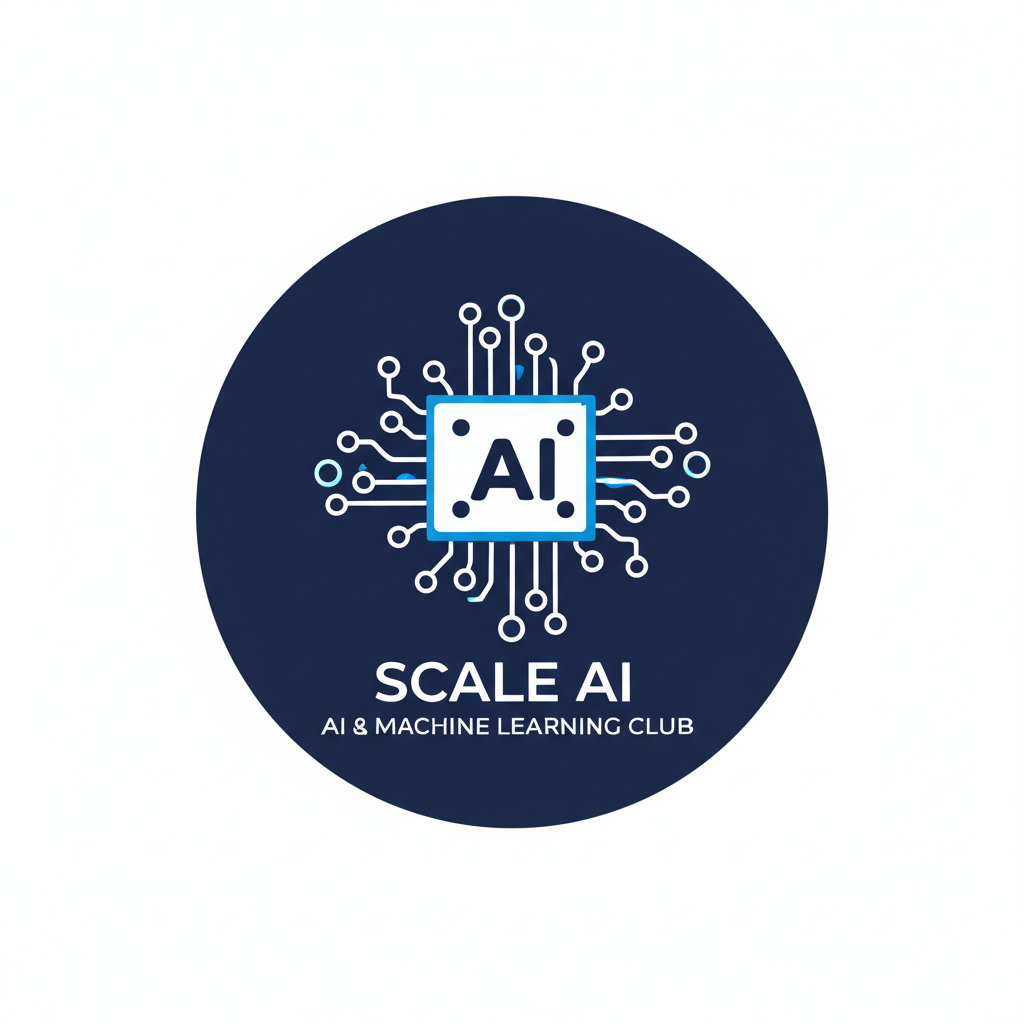

Review: The logo is a decent representation of an AI/ML club.  The central circuit board with "AI" is clear and directly relates to the theme. The color scheme is professional and the design is vector-friendly, ensuring scalability. However, it lacks uniqueness; the circuit board motif is overused in tech logos.  The connection to IIT Gandhinagar's academic identity is absent.  While easily recognizable in color, the monochrome version loses some impact. It feels more like a generic tech company logo than a university club brand.

Rating: 6/10
logo reviews:
best logo from all reviews: Based solely on the provided reviews, there's no single "best" logo across all sets.  Each set of reviews presents different logos with similar ratings, and the highest-rated logo in each set doesn't consistently outperform others across all criteria.

The highest rating consistently achieved is a 7/10, but even these logos have significant flaws noted in the reviews (e.g., inclusion of text against the b

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage
from langchain_core.messages import HumanMessage
from IPython.display import Image, display
import base64
from dotenv import load_dotenv
load_dotenv()

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")


results = []

print("--- Starting Logo Review ---")
for i, logo_b64 in enumerate(logo_candidates):
    print(f"\nReviewing Logo {i+1}...")
    display(Image(data=base64.b64decode(logo_b64), width=200))
    review_message = HumanMessage(
        content=[
            {
                "type": "text",
                "text": f"Review this logo based on the following criteria: '{user_input}'. Provide a concise review and a rating from 1 to 10.",
            },
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{logo_b64}"}
            },
        ]
    )
    response = llm.invoke([review_message])
    print(f"Review: {response.content}")
    
    results.append({
        "logo_index": i + 1,
        "review": response.content
    })

print("logo reviews:")
final_prompt = ""
for r in results:
    final_prompt += f"\nLogo Index: {r['logo_index']}\nReview: {r['review']}\n"

final_prompt += "\nBased *only* on the reviews provided, select the best logo (by its index number) and explain your decision."

final_response = llm.invoke(final_prompt)

print("best logo from all reviews:", final_response.content)
